## Loading of Steinmetz data

includes some visualizations

In [1]:
#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


In [2]:
#@title Import packages and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True



In [3]:
#@title Data loading

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = alldat[11]
print(dat.keys())

dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive'])


`alldat` contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. For each `dat = alldat[k]`, you have the fields below. For extra variables, check out the extra notebook and extra data files (lfp, waveforms and exact spike times, non-binned). 

* `dat['mouse_name']`: mouse name
* `dat['date_exp']`: when a session was performed
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['ccf']`: Allen Institute brain atlas coordinates for each neuron. 
* `dat['ccf_axes']`: axes names for the Allen CCF. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_times']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['wheel']`: turning speed of the wheel that the mice uses to make a response, sampled at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position.
* `dat['face']`: average face motion energy from a video camera. 
* `dat['licks']`: lick detections, 0 or 1.   
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['%X%_passive']`: same as above for `X` = {`spks`, `pupil`, `wheel`, `contrast_left`, `contrast_right`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 
* `dat['prev_reward']`: time of the feedback (reward/white noise) on the previous trial in relation to the current stimulus time. 
* `dat['reaction_time']`: ntrials by 2. First column: reaction time computed from the wheel movement as the first sample above `5` ticks/10ms bin. Second column: direction of the wheel movement (`0` = no move detected).  




#Look at Mouse Specific Data

In [6]:
#@title Find which mice had which areas recorded by session

for i in range (len(alldat)):
  data = alldat[i]
  session = i 
  print(i)
  print(data["mouse_name"])
  brain_areas = data["brain_area"]
  print(np.unique(brain_areas))

0
Cori
['ACA' 'CA3' 'DG' 'LS' 'MOs' 'SUB' 'VISp' 'root']
1
Cori
['CA1' 'POST' 'VISl' 'VISpm' 'root']
2
Cori
['CA1' 'DG' 'LP' 'MG' 'MRN' 'NB' 'POST' 'SPF' 'VISam' 'VISp' 'root']
3
Forssmann
['ACA' 'CA1' 'DG' 'LGd' 'LSr' 'MOs' 'SUB' 'TH' 'VISa' 'VISp' 'VPL']
4
Forssmann
['ACA' 'CA1' 'DG' 'MOs' 'OLF' 'ORB' 'PL' 'SUB' 'VISa' 'root']
5
Forssmann
['AUD' 'CA1' 'SSp' 'TH' 'root']
6
Forssmann
['CA3' 'CP' 'EPd' 'LD' 'PIR' 'SSp' 'VPL' 'root']
7
Hench
['CA1' 'CA3' 'DG' 'ILA' 'LD' 'LP' 'LSr' 'MOs' 'PL' 'PO' 'SUB' 'TT' 'VISa'
 'VISp' 'root']
8
Hench
['CA1' 'CA3' 'LD' 'LSr' 'ORBm' 'PL' 'TH' 'TT' 'VISam' 'VISl' 'VPL' 'root']
9
Hench
['CA1' 'DG' 'GPe' 'MB' 'MRN' 'POL' 'POST' 'SCm' 'SCsg' 'VISl' 'VISp'
 'VISrl' 'root']
10
Hench
['CP' 'LSc' 'LSr' 'MOp' 'PT' 'root']
11
Lederberg
['ACA' 'CA1' 'DG' 'LGd' 'LH' 'MD' 'MOs' 'PL' 'SUB' 'VISam' 'VISp' 'root']
12
Lederberg
['ACA' 'CA1' 'DG' 'LGd' 'MB' 'MOs' 'MRN' 'MS' 'PL' 'RN' 'SCm' 'SCs'
 'VISam' 'ZI' 'root']
13
Lederberg
['CA1' 'MOs' 'MRN' 'ORB' 'PAG' 'RSP' 'SC

In [ ]:
#@title Create a list of all the mouse names

#this isnt needed just nice to print

names = []
for dat_i in alldat:
  name = dat_i["mouse_name"]
  if name not in names:
    names.append(name)
print("Mice: {}".format(names))


In [11]:
#@title Group the data by Mouse

mouse_dict = {} # create a dictionary 

for session, dat_i in enumerate(alldat):
  name = dat_i["mouse_name"]
  if name not in mouse_dict.keys():
    mouse_dict[name] = [dat_i]

  else:
    lst = mouse_dict[name]
    lst.append(dat_i)
    mouse_dict[name] = lst



# PRINT THE INFO FROM BEFORE TO CHECK
brain_areas = dat_i["brain_area"]
print("Session: {}, Name: {}, Areas: {}".format(session, name, np.unique(brain_areas)))
# # spks_i = dat_i["spks"]

print()


Session: 38, Name: Theiler, Areas: ['ACA' 'CA1' 'DG' 'ILA' 'LP' 'MOs' 'PL' 'SUB' 'VISam' 'VISp' 'root']



#Plots of Neuron Activity by Region


Name: Cori, Sessions: 3
spk_trial_region_avg.shape (178, 250)
spk_trial_region_avg.shape (114, 250)


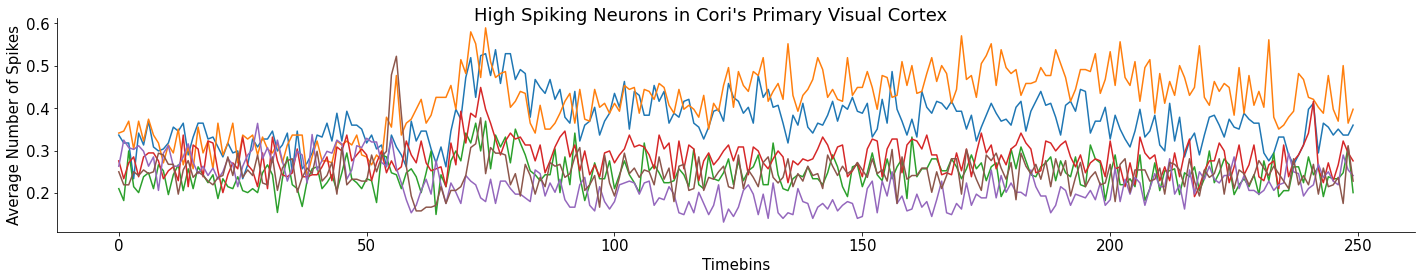

In [14]:
#@title Test code for "Brain Area by Mouse"

assigned_region = "VISp"

print()
# analyse something for all runs of a sinlge mouse, here we are just looking at the brain areas but you can put whatever in there
# for mouse in mouse_dict.keys():
for mouse in ["Cori"]:
  mouse_data =  mouse_dict[mouse] #list of the sessions corresponding to this mouse, [alldat[0], alldat[1], alldat[2]]
  num_sessions = len(mouse_dict[mouse])
  print("Name: {}, Sessions: {}".format(mouse, num_sessions))

  # brain_area_mouse = []
  # for rn in mouse_data:
  #   brain_areas_rn = rn['brain_area']
  #   brain_area_mouse.extend(np.unique(brain_areas_rn))
  # print(brain_area_mouse)


  # spikes is neurons, trials, time
  # values is the number of spikes by time bin
  
  thing = None
  for trial in mouse_data:
    spk_trial = trial['spks']
    if assigned_region in trial["brain_area"]:
      spk_trial_region = spk_trial[trial["brain_area"] == assigned_region]

      # average over trials
      spk_trial_region_avg = np.mean(spk_trial_region, axis=1)

      # take only values that are average above 0.2 # Majid don't fight me this is just visualization
      spk_trial_region_avg_good = spk_trial_region_avg[np.mean(spk_trial_region_avg, axis=1) >= 0.2,:]
      print("spk_trial_region_avg.shape", spk_trial_region_avg.shape)

      if thing is not None:
        thing = np.concatenate((thing, spk_trial_region_avg_good))
      else:
        thing = spk_trial_region_avg_good
        
  plot = plt.figure()
  plt.plot(d.T) # had to transpose so that time was on the x axis 
  #plot.suptitle("{}, {}".format(mouse, assigned_region))
  plot.suptitle("High Spiking Neurons in Cori's Primary Visual Cortex")
  plt.xlabel("Timebins")  # change axis labels if you need reminders
  plt.ylabel("Average Number of Spikes")
  plt.show()


## Now for the Mice and the Regions (aka. many plots)



In [34]:
  line = (np.mean(dat["gocue"]))*100
  print(line)

59.72399533502413



['Cori', 'Forssmann', 'Hench', 'Lederberg', 'Moniz', 'Muller', 'Radnitz', 'Richards', 'Tatum', 'Theiler']


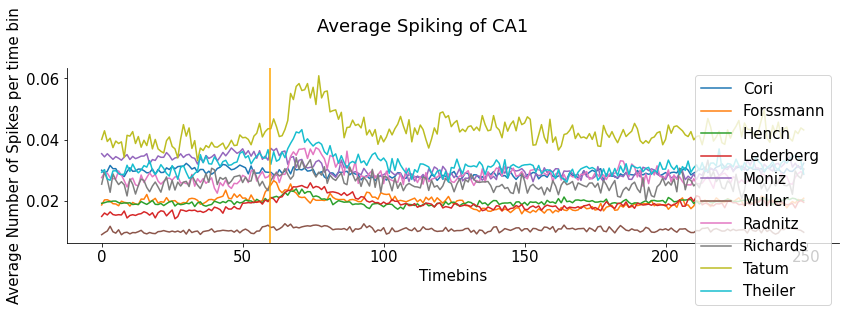


['Cori', 'Forssmann', 'Hench', 'Lederberg', 'Richards', 'Tatum']


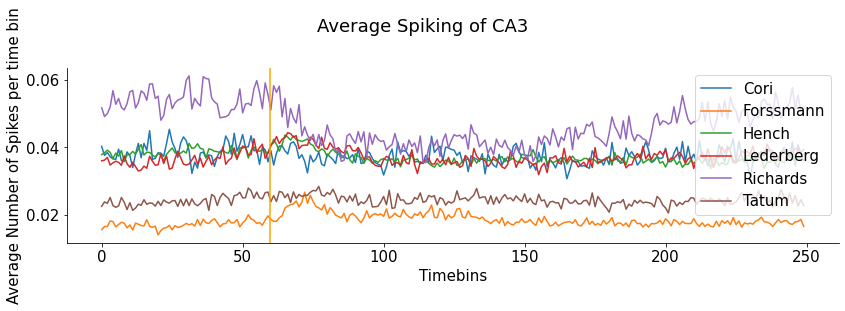


['Cori', 'Forssmann', 'Hench', 'Lederberg', 'Moniz', 'Muller', 'Radnitz', 'Theiler']


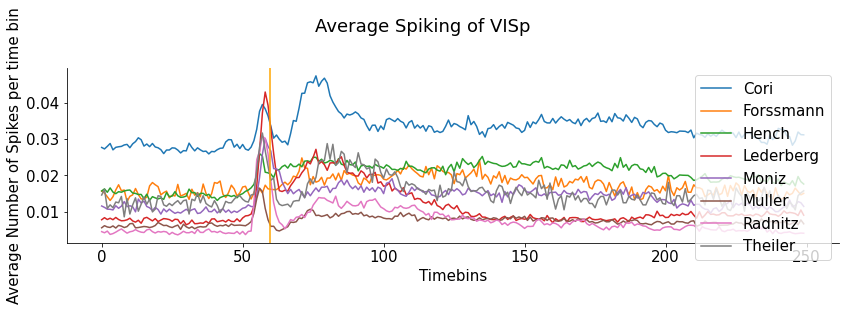


['Cori', 'Moniz', 'Muller', 'Radnitz']


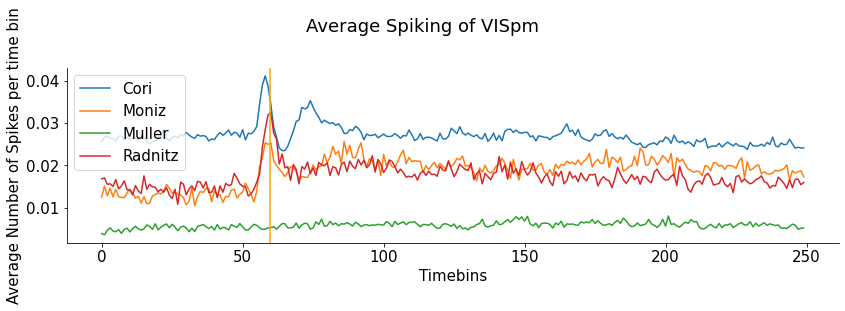


['Hench', 'Muller']


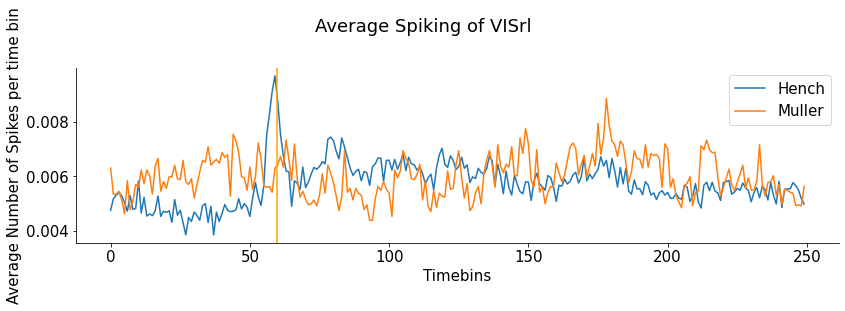


['Cori', 'Hench', 'Lederberg', 'Moniz', 'Muller', 'Radnitz', 'Tatum', 'Theiler']


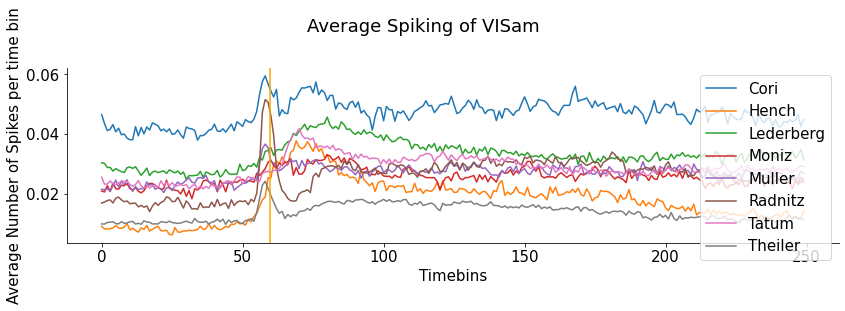


['Forssmann', 'Hench', 'Moniz', 'Richards']


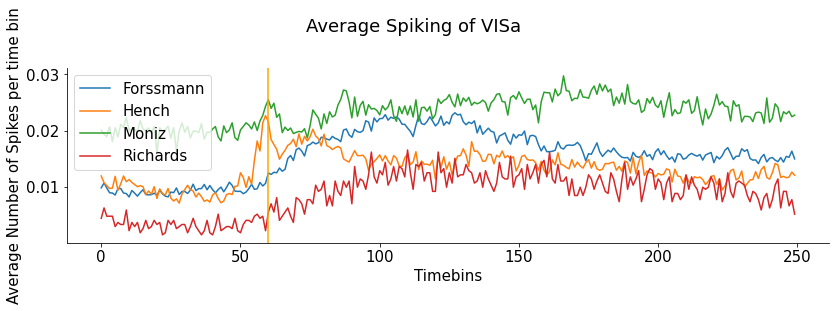


['Cori', 'Forssmann', 'Hench', 'Lederberg', 'Moniz', 'Muller', 'Radnitz', 'Richards', 'Tatum', 'Theiler']


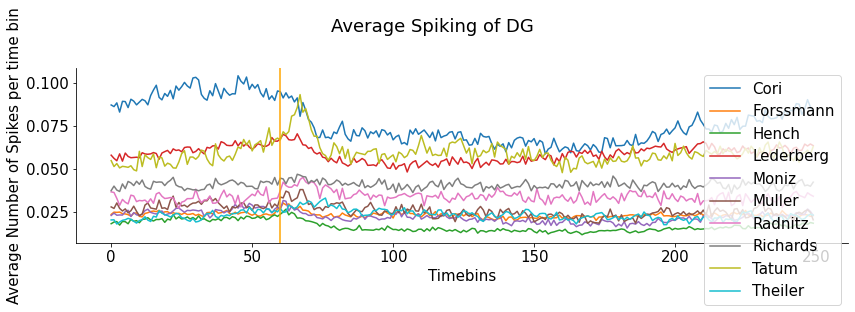


['Cori', 'Forssmann', 'Hench', 'Lederberg', 'Muller', 'Radnitz', 'Richards', 'Tatum', 'Theiler']


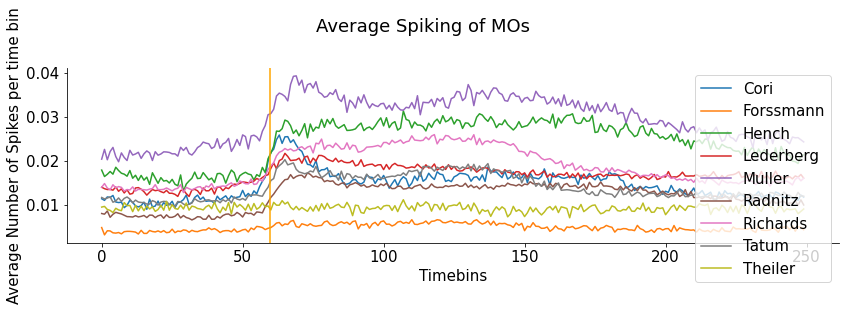


['Cori', 'Moniz']


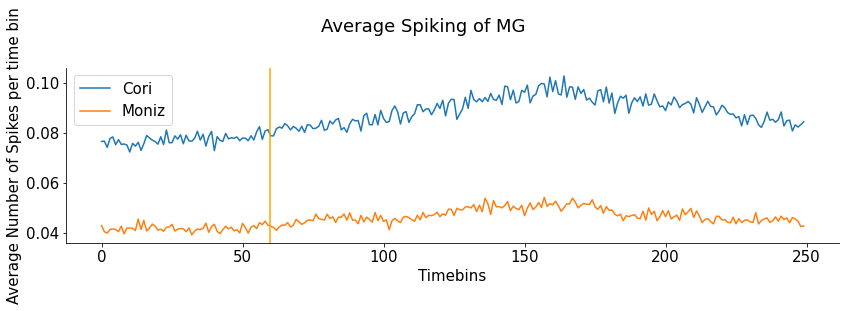


['Hench', 'Moniz', 'Radnitz']


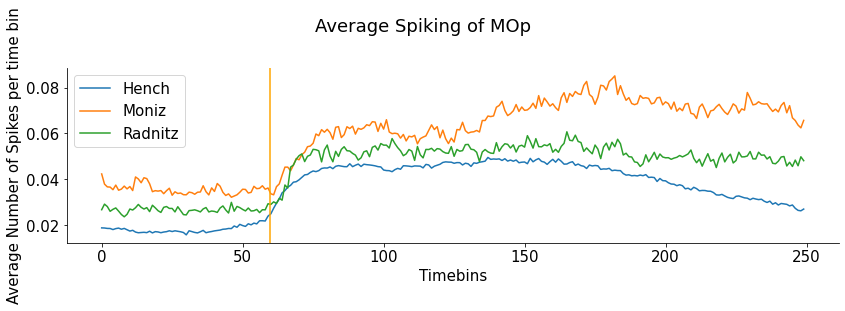

In [62]:
# list out the regions we want to look at 
assigned_regions = ['CA1', 'CA3',"VISp", "VISpm", "VISrl", "VISam", "VISa", "DG", "MOs", "MG", "MOp" ,]
# change this to be whatever regions we want, the order matters

# LIST OF AREAS 
# "VISp", "VISpm", "VISI", "VISrl", "VISam", "VISa", 'CA1', 'CA3', "DG", "CP", "SCm", "SCs", "SNr", "SSp", "ACA", "ILA", "GPe", "ACB", "APN", "BLA", "LD", "LGd", "LP", "LS", "MD", "MG", "MOp", "MOs", "MRN", "OLF", "ORB", "PAG", "PL", "PO", "POL", "POST", "RSP", "RT", "SUB", "ZI", "VPL", "VPM"
# VISI is throwing an error

for assigned_region in assigned_regions:
  all_mice_names = []

  all_mice_lines = None
  print()
  
  for mouse in mouse_dict.keys():

    mouse_data =  mouse_dict[mouse] #list of the sessions corresponding to this mouse, [alldat[0], alldat[1], alldat[2]]
    num_sessions = len(mouse_dict[mouse])

    skp_all_sess = None
    for sess in mouse_data:
      spk_sess = sess['spks']
      if assigned_region in sess["brain_area"]:
        spk_sess_ass = spk_sess[sess["brain_area"] == assigned_region]

        # average over trials
        skp_sess_ass_av = np.mean(spk_sess_ass, axis=1)

        if skp_all_sess is not None:
          skp_all_sess = np.concatenate((skp_all_sess, skp_sess_ass_av))
        else:
          skp_all_sess = skp_sess_ass_av

    # average over all neurons
    
    if skp_all_sess is not None:
      name_i = mouse
      all_mice_names.append(name_i)
      mouse_i = np.mean(skp_all_sess, axis=0)
      mouse_i = np.expand_dims(mouse_i, 0)

      
      
      # this looks for the mice that has the areas we're specifying
    
      if all_mice_lines is not None:
        all_mice_lines = np.concatenate((all_mice_lines, mouse_i), axis = 0)
      else:
        all_mice_lines = mouse_i 

  print(all_mice_names) # prints the mice names that had recordings from that area 

  # find the avg go cue across all data
  avg_gocue = (np.mean(dat["gocue"]) * 100)
  # print(avg_gocue)




  # make the plots 
  plot = plt.figure(figsize=(12, 4))
  plt.plot(all_mice_lines.T) # had to transpose so that time was on the x axis 
  plt.axvline(avg_gocue, color="orange", label="Onset of Stimuli")

  plot.suptitle("Average Spiking of {}".format(assigned_region))
  plt.xlabel("Timebins")  # change axis labels if you need reminders
  plt.ylabel("Average Number of Spikes per time bin")
  plt.legend(all_mice_names)
  plt.show()


# TODO : add line for onset of stimulu 

In [ ]:
plt.figure(figsize=(6, 7))
plt.plot(all_mice_lines.T) # had to transpose so that time was on the x axis


  plot = plt.figure()
  plt.plot(all_mice_lines.T) # had to transpose so that time was on the x axis 
  plt.axvline(avg_gocue, color="orange", label="Onset of Stimuli")
  plot.suptitle("Average Spiking of {}".format(assigned_region))
  plt.xlabel("Timebins")  # change axis labels if you need reminders
  plt.ylabel("Average Number of Spikes per time bin")
  plt.legend(all_mice_names)
  plt.show()

##Table of the mice and brain areas

In [18]:
# Unique brain areas across all sessions


ba = []
for i in range(alldat.shape[0]):
  unique_barea = np.unique(alldat[i]['brain_area'])
  for u in unique_barea:
    ba.append(u)
ubs = list(np.unique(ba))

# Create pandas DataFrame
df = pd.DataFrame(columns=['session', 'mouse_name', 'n_neuron'] + ubs)

for i in range(alldat.shape[0]):
  this_session: dict = {}
  unique_barea = list(np.unique(alldat[i]['brain_area']))
  this_session['session'] = i
  this_session['mouse_name'] = alldat[i]['mouse_name']
  this_session['n_neuron'] = alldat[i]['spks'].shape[0]
  this_session['n_trial'] = alldat[i]['spks'].shape[1]
  for ubrea in unique_barea:
    n_neuron, n_trial, _ = (alldat[i]['spks'][alldat[i]['brain_area'] == ubrea]).shape
    this_session[ubrea] = n_neuron

  df = df.append(this_session, ignore_index=True)

df

,session,mouse_name,n_neuron,ACA,ACB,APN,AUD,BLA,BMA,CA,CA1,CA2,CA3,CL,COA,CP,DG,DP,EP,EPd,GPe,IC,ILA,LD,LGd,LH,LP,LS,LSc,LSr,MB,MD,MEA,MG,MOp,MOs,MRN,MS,NB,OLF,ORB,ORBm,OT,PAG,PIR,PL,PO,POL,POST,PT,RN,RSP,RT,SCig,SCm,SCs,SCsg,SI,SNr,SPF,SSp,SSs,SUB,TH,TT,VAL,VISa,VISam,VISl,VISp,VISpm,VISrl,VPL,VPM,ZI,root,n_trial
0,0,Cori,734,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,NaN,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,178,NaN,NaN,NaN,NaN,NaN,18,214.0
1,1,Cori,1070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231,NaN,302,NaN,NaN,NaN,NaN,156,251.0
2,2,Cori,619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,137,NaN,NaN,41,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114,NaN,114,NaN,NaN,NaN,NaN,NaN,12,228.0
3,3,Forssmann,1769,304,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,NaN,NaN,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,435,NaN,NaN,NaN,NaN,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108,256,NaN,NaN,81,NaN,NaN,39,NaN,NaN,72,NaN,NaN,NaN,249.0
4,4,Forssmann,1077,53,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,NaN,NaN,NaN,181,32,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524,254.0
5,5,Forssmann,1169,NaN,NaN,NaN,246,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628,290.0
6,6,Forssmann,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,NaN,NaN,59,NaN,NaN,NaN,52,NaN,NaN,NaN,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,NaN,NaN,89,252.0
7,7,Hench,1156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,NaN,17,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,144,41,NaN,NaN,120,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN,82,NaN,63,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN,4,250.0
8,8,Hench,788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,55,NaN,NaN,38,104,NaN,NaN,NaN,73,NaN,NaN,6,372.0
9,9,Hench,1172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76,NaN,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275,NaN,NaN,NaN,NaN,NaN,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154,41,NaN,NaN,NaN,NaN,NaN,23,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,105,NaN,136,NaN,NaN,NaN,36,447.0
